In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("C:\\Users\\Avinesh\\Downloads\\stock portfolio performance data set (2).xlsx", sheet_name='all period')
data

,Unnamed: 0,the weight of the stock-picking concept,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,the original investment performance indicator,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,the normalized investment performance indicator,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
1,1,1,0,0,0,0,0,0.139,0.01,1.33,0.149,0.663,0.525,0.531875,0.478116,0.738015,0.8,0.52,0.411765
2,2,0,1,0,0,0,0,0.143,0.01,1.17,0.108,0.663,0.65,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
3,3,0,0,1,0,0,0,0.173,0.018,1.3,0.144,0.638,0.513,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
4,4,0,0,0,1,0,0,0.096,-0.002,1.39,0.144,0.613,0.475,0.324351,0.255634,0.8,0.756046,0.36,0.270588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,0.2,0.2,0.2,0,0.2,0.2,0.171,0.022,0.94,0.1,0.7,0.638,0.685397,0.706792,0.322843,0.329431,0.64,0.729412
60,60,0.2,0.2,0,0.2,0.2,0.2,0.153,0.018,0.88,0.087,0.725,0.638,0.595786,0.631599,0.259952,0.204156,0.72,0.729412
61,61,0.2,0,0.2,0.2,0.2,0.2,0.156,0.018,0.97,0.104,0.663,0.525,0.612546,0.631119,0.35973,0.368958,0.52,0.411765
62,62,0,0.2,0.2,0.2,0.2,0.2,0.161,0.018,0.98,0.094,0.688,0.663,0.635785,0.634402,0.362039,0.277221,0.6,0.8


In [3]:
X = data.iloc[1:,14].array.reshape(-1, 1)
y = data.iloc[1:,13].array.reshape(-1, 1)
X.shape,y.shape

((63, 1), (63, 1))

In [4]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.7)
X_train.shape

(18, 1)

# LINEAR REGRESSION

In [5]:
from sklearn.linear_model import LinearRegression
algl=LinearRegression()
algl.fit(X_train,Y_train)


LinearRegression()

In [6]:
algl.coef_,algl.intercept_

(array([[0.84147366]]), array([0.08038642]))

In [7]:
Y_pred = algl.predict(X_test)
train_score = algl.score(X_train, Y_train)
test_score = algl.score(X_test, Y_test)
print("Train Score: ", train_score)
print("Test Score: ", test_score)



Train Score:  0.9572822284504215
Test Score:  0.9204102998883246


In [8]:
import matplotlib.pyplot as plt
import numpy as np

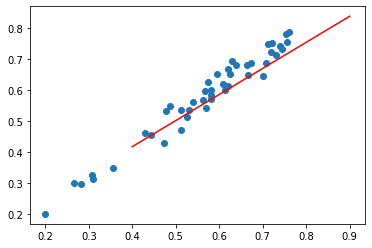

In [9]:
m=algl.coef_
c=algl.intercept_
x_line=np.arange(0.4,0.9,0.000001)
y_line=m*x_line +c
y_line = np.squeeze(y_line)
plt.plot(x_line,y_line,"r")
# train1d=X_train.reshape(75)
plt.scatter(X_test,Y_test)
plt.show()

# SVM

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
y_train = np.ravel(y_train)
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test_scaled)
test_score = svr.score(X_test, y_test)
test_score

0.634415998763042

# KNN

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [13]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.037557866143794034